# Generate INRIA datset in NxN pixel tiles:
## (Needs original INRIA dataset, available in https://project.inria.fr/aerialimagelabeling/)

In [1]:
from pathlib import Path

DATASET_PATH = Path('/storage/internal/data/r-pueblas/inria')

TRAIN_PATH = DATASET_PATH / 'train'

TEST_PATH = DATASET_PATH / 'test'

TILES_IMG_TRAIN_PATH = TRAIN_PATH / 'images_tiles'
TILES_LABEL_TRAIN_PATH = TRAIN_PATH / 'gt_tiles'
TILES_IMG_TEST_PATH = TEST_PATH / 'images_tiles'

TILES_IMG_TRAIN_PATH.mkdir(parents=True, exist_ok=True)
TILES_LABEL_TRAIN_PATH.mkdir(parents=True, exist_ok=True)
TILES_IMG_TEST_PATH.mkdir(parents=True, exist_ok=True)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tqdm

%matplotlib inline

In [3]:
img = cv2.imread(str(TRAIN_PATH / 'images/austin1.tif'))

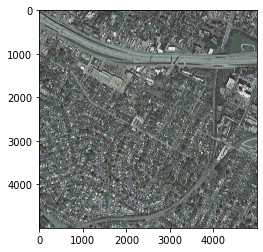

In [4]:
plt.imshow(img)

In [5]:
img.shape

(5000, 5000, 3)

#### Specify tile size, in this case 512x512

In [6]:
height, width, dim = img.shape

tile_size = 512

tiles = []

for h in range(0,height,tile_size):
    for w in range(0,width,tile_size):
        i = img[h:h+tile_size,w:w+tile_size]
        i = np.pad(i, ((0, tile_size - i.shape[0]), (0, tile_size - i.shape[1]), (0, 0)),
                   mode='constant', constant_values=3)
        
        tiles.append(i)

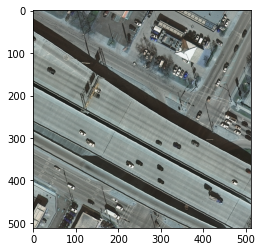

In [7]:
plt.imshow(tiles[0])

In [8]:
TILE_SIZE = 512

for file in tqdm.tqdm((TRAIN_PATH).glob('images/*.tif')):
    img = cv2.imread(str(file))
    label = cv2.imread(str(TRAIN_PATH / 'gt' / file.name))
    
    # there is at least a rooftop in the image
    if label.any():
        height, width, dim = img.shape

        tile_size = TILE_SIZE

        for h in range(0,height,tile_size):
            for w in range(0,width,tile_size):
                i = img[h:h+tile_size,w:w+tile_size]
                i = np.pad(i, ((0, tile_size - i.shape[0]), (0, tile_size - i.shape[1]), (0, 0)),
                           mode='constant', constant_values=0)
                
                l = label[h:h+tile_size,w:w+tile_size]
                l = np.pad(l, ((0, tile_size - l.shape[0]), (0, tile_size - l.shape[1]), (0, 0)),
                           mode='constant', constant_values=0)
                
                # there is at least a rooftop in the tile
                if (i.any() and l.any()):
                    cv2.imwrite(str(TILES_IMG_TRAIN_PATH / ('{0}_{1}_{2}.png').format(file.stem, h, w)), i)
                    cv2.imwrite(str(TILES_LABEL_TRAIN_PATH / ('{0}_{1}_{2}.png').format(file.stem, h, w)), l)
                    cv2.imwrite(str(TILES_LABEL_TRAIN_PATH / ('{0}_{1}_{2}_viz.png').format(file.stem, h, w)), l*255)

180it [05:19,  1.78s/it]


In [26]:
import random

TILES_FINAL_PATH = DATASET_PATH / 'tiles_final'
TILES_FINAL_TRAIN_PATH = TILES_FINAL_PATH / 'train'
TILES_FINAL_TRAIN_IMG_PATH = TILES_FINAL_TRAIN_PATH / 'image'
TILES_FINAL_TRAIN_LBL_PATH = TILES_FINAL_TRAIN_PATH / 'label'
TILES_FINAL_VAL_PATH = TILES_FINAL_PATH / 'val'
TILES_FINAL_VAL_IMG_PATH = TILES_FINAL_VAL_PATH / 'image'
TILES_FINAL_VAL_LBL_PATH = TILES_FINAL_VAL_PATH / 'label'
TILES_FINAL_TRAIN_LBL_PATH = TILES_FINAL_TRAIN_PATH / 'label'
TILES_FINAL_TEST_PATH = TILES_FINAL_PATH / 'test'
TILES_FINAL_TEST_IMG_PATH = TILES_FINAL_TEST_PATH / 'image'
TILES_FINAL_TEST_LBL_PATH = TILES_FINAL_TEST_PATH / 'label'

TILES_FINAL_PATH.mkdir(parents=True, exist_ok=True)
TILES_FINAL_TRAIN_PATH.mkdir(parents=True, exist_ok=True)
TILES_FINAL_TRAIN_IMG_PATH.mkdir(parents=True, exist_ok=True)
TILES_FINAL_TRAIN_LBL_PATH.mkdir(parents=True, exist_ok=True)
TILES_FINAL_VAL_PATH.mkdir(parents=True, exist_ok=True)
TILES_FINAL_VAL_IMG_PATH.mkdir(parents=True, exist_ok=True)
TILES_FINAL_VAL_LBL_PATH.mkdir(parents=True, exist_ok=True)
TILES_FINAL_TEST_PATH.mkdir(parents=True, exist_ok=True)
TILES_FINAL_TEST_IMG_PATH.mkdir(parents=True, exist_ok=True)
TILES_FINAL_TEST_LBL_PATH.mkdir(parents=True, exist_ok=True)

In [42]:
tiles_list = list((TILES_IMG_TRAIN_PATH).glob('*.png'))

n_tiles = len(tiles_list)
n_test = n_tiles // 10
n_val = n_tiles // 10
n_train = n_tiles - n_test - n_val

random.shuffle(tiles_list)
label_list = [TILES_LABEL_TRAIN_PATH / file.name for file in tiles_list]

train_tiles = tiles_list[:n_train]
train_label = label_list[:n_train]

val_tiles = tiles_list[n_train:n_train+n_val]
val_label = label_list[n_train:n_train+n_val]

test_tiles = tiles_list[-n_test:]
test_label = label_list[-n_test:]

In [54]:
print("Train split size: ", len(train_tiles))
print("Val split size: ", len(val_tiles))
print("Test split size: ", len(test_tiles))

Train split size:  11851
Val split size:  1481
Test split size:  1481


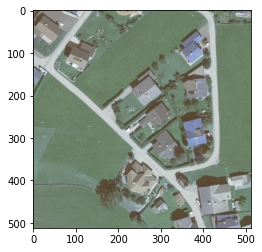

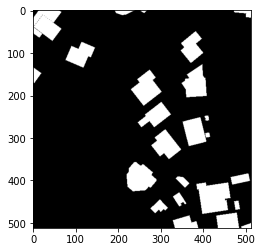

In [58]:
img = cv2.imread(str(train_tiles[100]))
label = cv2.imread(str(train_label[100]))

plt.imshow(img)
plt.show()
plt.imshow(label)
plt.show()

In [64]:
# TRAIN SPLIT to TILES_FINAL_TRAIN_IMG_PATH and TILES_FINAL_TRAIN_LBL_PATH
import shutil

for tile, label in zip(train_tiles, train_label):
    shutil.move(str(tile), str(TILES_FINAL_TRAIN_IMG_PATH / tile.name))
    shutil.move(str(label), str(TILES_FINAL_TRAIN_LBL_PATH / label.name))

In [65]:
# VAL SPLIT to TILES_FINAL_VAL_IMG_PATH and TILES_FINAL_VAL_LBL_PATH

for tile, label in zip(val_tiles, val_label):
    shutil.move(str(tile), str(TILES_FINAL_VAL_IMG_PATH / tile.name))
    shutil.move(str(label), str(TILES_FINAL_VAL_LBL_PATH / label.name))

In [66]:
# TEST SPLIT to TILES_FINAL_TEST_IMG_PATH and TILES_FINAL_TEST_LBL_PATH

for tile, label in zip(test_tiles, test_label):
    shutil.move(str(tile), str(TILES_FINAL_TEST_IMG_PATH / tile.name))
    shutil.move(str(label), str(TILES_FINAL_TEST_LBL_PATH / label.name))